# Error Bars

It is common practice in High Energy Physics (and other fields) to display error bars for each
 histogram bin, corresponding to either the associated statistical or systematic errors.  While the
 interpretation and meaning of the aforementioned error bars is a point of constant contention
 ([Those Deceiving Error Bars](http://www.science20.com/quantum_diaries_survivor/those_deceiving_error_bars-85735)), the entries in a histogram bin are typically seen as drawn     from a Poisson distribution, and thus the standard deviation for a bin with $N$ entries is $\sqrt{N}$.

### Error Bar Calculation


 Let us produce a simple histogram with error bars.

In [1]:
import numpy as np
from histogram_plus import hist
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

np.random.seed(1001)
data = np.random.normal(size=1000)

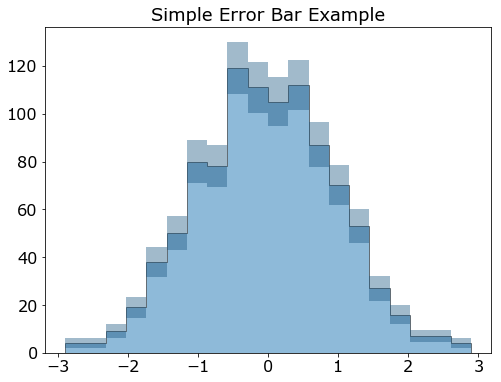

In [2]:
_ = hist(data, bins=20, errorbars=True)
plt.title('Simple Error Bar Example')

By default, when no weights are given, the error bars are calculated as $\pm\sqrt{N}$ above and below the bin height.  This is equivalent to using the argument `err_type='gaussian'` when calling the `hist` function.  If weights are included with the input data, then the default error bars are calculated as the root of the sum the square of the weights.  This is equivalent to declaring `err_type='sumW2'.

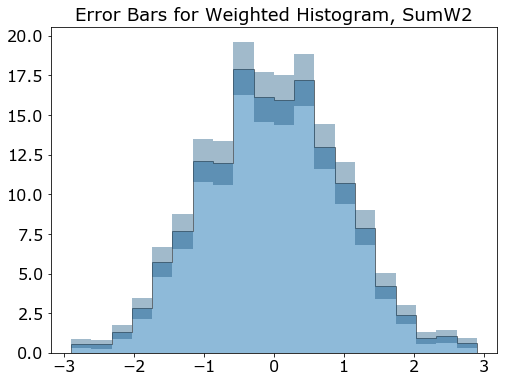

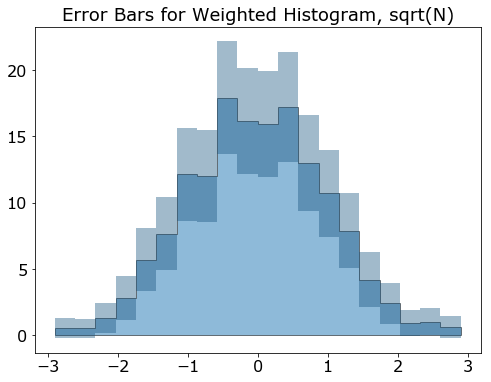

In [3]:
w = np.random.uniform(0.1, 0.2, size=1000)
_ = hist(data, bins=20, weights=w, errorbars=True)
plt.title('Error Bars for Weighted Histogram, SumW2')
plt.figure()
_ = hist(data, bins=20, weights=w, errorbars=True, err_type='gaussian')
plt.title('Error Bars for Weighted Histogram, sqrt(N)')


### Error Bar Display

There are currently two styles for displaying error bars, `err_style='band'` and `err_style='line'`.  By default, the `band` style is used for filled histograms, while the `line` style is used for step and marker histograms.

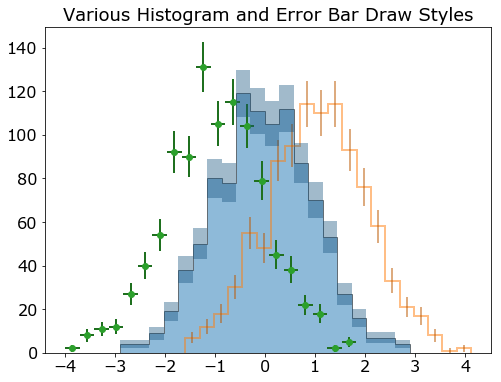

In [4]:
data2 = np.random.normal(1,1, size=1000)
data3 = np.random.normal(-1,1, size=1000)

_ = hist(data, bins=20, errorbars=True)
_ = hist(data2, bins=20, errorbars=True, histtype='step')
_ = hist(data3, bins=20, errorbars=True, histtype='marker')
plt.title('Various Histogram and Error Bar Draw Styles')

Error bar color is handled automatically by default (`err_color='auto'`).  For a non-stacked histogram, the error bar color is selected to be a slightly darker version of the main histogram color.

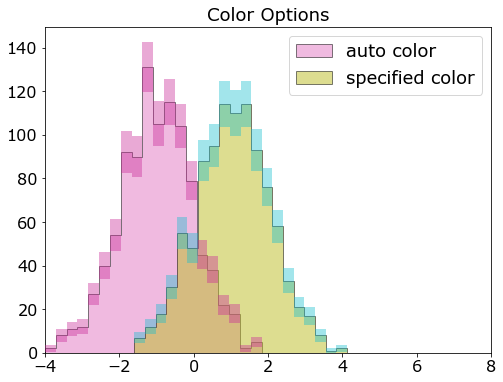

In [5]:
_ = hist(data3, bins=20, errorbars=True, color='C6', label='auto color')
_ = hist(data2, bins=20, errorbars=True, color='C8', err_color='C9', label='specified color')
plt.xlim(-4,8)
plt.title('Color Options')
plt.legend()

### Stacked Histograms

For stacked histograms, the error bars are determined by the sum of all contributions for an individual bin, and placed around the total bin height.  If the color mode is automatic, the error bar color is chosen to be the next in the current color cycle, instead of being a modified version of the currently displayed colors.

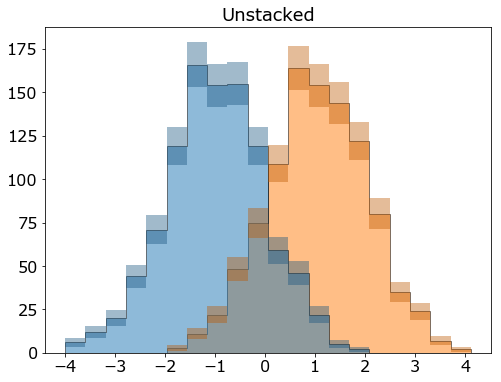

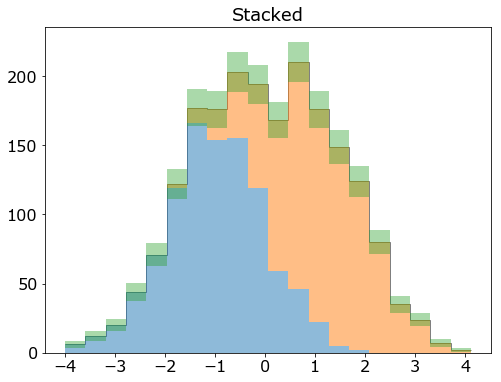

In [6]:
_ = hist([data3, data2], bins=20, errorbars=True)
plt.title('Unstacked')
plt.figure()
_ = hist([data3, data2], bins=20, errorbars=True, stacked = True)
plt.title('Stacked')

### Scale and Normalization

If scale and/or normalization is applied to the histogram, the error bars are scaled appropriately as well.

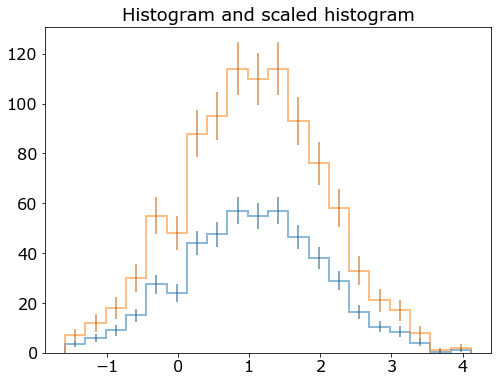

In [7]:
_ = hist(data2, bins=20, errorbars=True, histtype='step', scale=0.5)
_ = hist(data2, bins=20, errorbars=True, histtype='step')

plt.title('Histogram and scaled histogram')